In [1]:
### This file is the demo data figure for the paper 'Adaptive stretching of representations across brain regions and deep learning model layers'

import pandas as pd
import os
from scipy import stats
import torch
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from textwrap import fill
import matplotlib.lines as mlines

In [2]:
def compare(Mtr,Mat):              
    Mcolour_vec=torch.zeros(120)
    Base_vec=np.zeros(120)
    cc=0
    for row in range(16):
      for col in range(row+1,16):
        Mcolour_vec[cc]=Mat[row,col]
        Base_vec[cc]=Mtr[row,col]
        cc+=1
    [corr,pvalue] = stats.spearmanr(Base_vec,Mcolour_vec)
    return corr

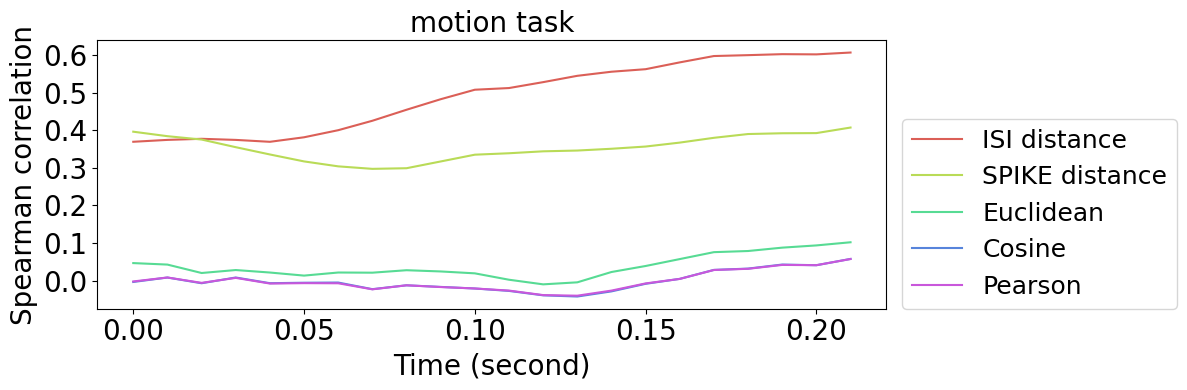

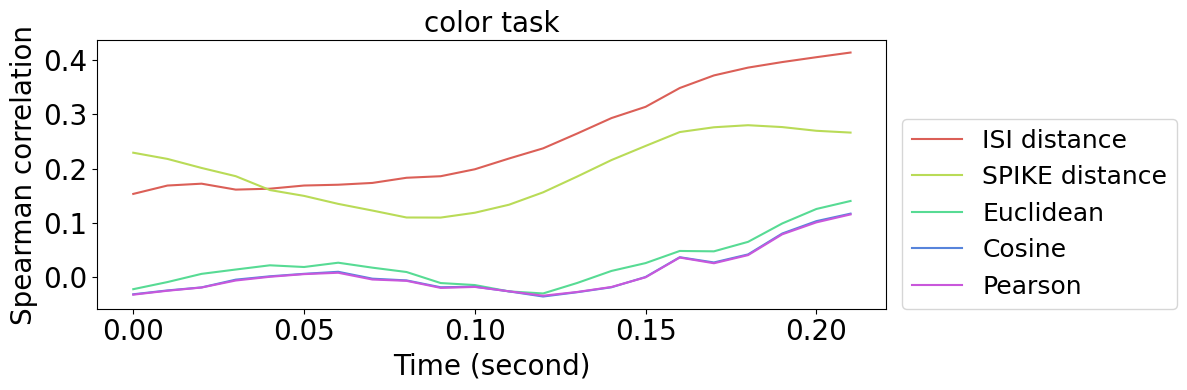

In [3]:
## ****** Demo for Figure 2 ****** ##
upper_time = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
upper_time2 = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21]
points={'[0, 0]':0,'[-5, 0]':1,'[5, 0]':2,'[0, -5]':3,'[0, 5]':4,'[90, 90]':5,'[90, 30]':6,'[90, -30]':7,'[90, -90]':8,
        '[30, 90]':9,'[30, 30]':10,'[30, -30]':11,'[30, -90]':12,'[-30, 90]':13,'[-30, 30]':14,'[-30, -30]':15,
        '[-30, -90]':16,'[-90, 90]':17,'[-90, 30]':18,'[-90, -30]':19,'[-90, -90]':20}

record_sess=['100706', '100724', '100725', '100726', '100730', '100731', '100802', '100803', '100804', '100817', '100818', '100819', '100820', '100823', '100824', '100826', '100827', '100828', '100907', '100910', '100913', '100915', '100917', '100920', '100921', '101008', '101009', '101023', '101024', '101027', '101028', '101030', '101122', '101123', '101124', '101127', '101128', '101202', '101206', '101207', '101209', '101210', '101216', '110106', '110120', '110121']

colors = sns.color_palette("hls", 5)
baseline_matrix = torch.load('../data/mini_data_50ms/stimuli_matrix.pt')
bin_size = 50 #ms

for task in ['motion','color']:
    NN=0
    plt.figure(figsize=(12,4))
    for method in ['ISI','SPIKE','Euclidean','Cosine','Pearson']:
        if method in ['ISI','SPIKE']:
            correlation = []
            for time in upper_time:
                ED = torch.load(f'../data/mini_data_50ms/{task}_{method}_{time}_{bin_size}ms.pt')
                correlation.append(compare(ED, baseline_matrix))
            plt.plot([i for i in upper_time],correlation,'-',color=colors[NN])
            NN+=1

        else:
            correlation = []
            for time in upper_time2:
                if method == 'Euclidean':
                    temp =[]
                    for sess in record_sess:
                        matrix_temp = torch.load(f'../data/mini_data_50ms/ratecoding/e_{sess}_{task}_{time}_{bin_size}ms.pt')
                        temp.append(compare(matrix_temp, baseline_matrix))
                if method == 'Cosine':
                    temp =[]
                    for sess in record_sess:
                        matrix_temp = torch.load(f'../data/mini_data_50ms/ratecoding/c_{sess}_{task}_{time}_{bin_size}ms.pt')
                        temp.append(compare(matrix_temp, baseline_matrix))
                if method == 'Pearson':
                    temp =[]
                    for sess in record_sess:
                        matrix_temp = torch.load(f'../data/mini_data_50ms/ratecoding/p_{sess}_{task}_{time}_{bin_size}ms.pt')
                        temp.append(compare(matrix_temp, baseline_matrix))
                temp = [x for x in temp if not np.isnan(x)]                                    
                correlation.append(np.mean(temp))
            plt.plot(upper_time2, correlation, '-',color=colors[NN])
            NN+=1


    plt.legend( ['ISI distance','SPIKE distance','Euclidean','Cosine','Pearson'], bbox_to_anchor=(1.02, 0), loc=3, borderaxespad=0,fontsize=18)
    plt.title(f'{task} task',fontsize=20)
    plt.xlabel('Time (second)',fontsize=20)
    plt.ylabel('Spearman correlation',fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

In [4]:
## ****** Demo for Figure 3 ****** ##
def ave_ratio_s(ColourDM,MotionDM,qua):
    dhc=[]
    dvc=[]
    dhm=[]
    dvm=[]
    set=[]
    for comb1 in qua:
        for comb2 in qua:
            if comb1!=comb2:
                idx1 = points[comb1] #[0] color, [1] motion
                idx2 = points[comb2]
                if idx1[0] == idx2[0] : # same color but differ motion
                    dhc.append(float(ColourDM[comb1-1,comb2-1]))
                    dhm.append(float(MotionDM[comb1-1,comb2-1]))
                    # c0+=1
                elif idx1[1] == idx2[1] : # same motion but differ color
                    dvc.append(float(ColourDM[comb1-1,comb2-1]))
                    dvm.append(float(MotionDM[comb1-1,comb2-1]))

    return dhc,dvc,dhm,dvm


def get_distance_from(x,y,task):
    distance_m = []
    distance_c=[]
    for i in range(len(x)):
        point0 = x[i]
        point1 = y[i]

        if task=='color' and i<len(x)/2:
            distance_m.append(point0)
            distance_c.append(point1)
        elif task =='motion' and i>=len(x)/2:
            distance_m.append(point0)
            distance_c.append(point1)
    return np.mean(distance_m), np.mean(distance_c)



def plot_compare(x,y,itv=0.002):
    name = ['mismatch on motion' for i in range(int(len(x) / 2))] + ['mismatch on color' for i in range(int(len(y) / 2))]
    data = {'dc': x, 'dm': y, 'Set': name}
    dhcdhm = pd.DataFrame(data)
    sns.set(style='white',font_scale=1.5) 
    et=max(max(x),max(x)) + itv
    st=min(min(y),min(y)) - itv
    g = sns.jointplot(x="dc", y="dm", hue="Set", data=dhcdhm,height=6,xlim=(st,et),ylim=(st,et))
    g.ax_joint.set_xlabel("Dissimilarity in motion task",fontsize=24)
    g.ax_joint.set_ylabel("Dissimilarity in color task",fontsize=24)
    g.ax_joint.axline((0, 0), slope=1,c='k')
    plt.legend(fontsize=17)
    plt.show()


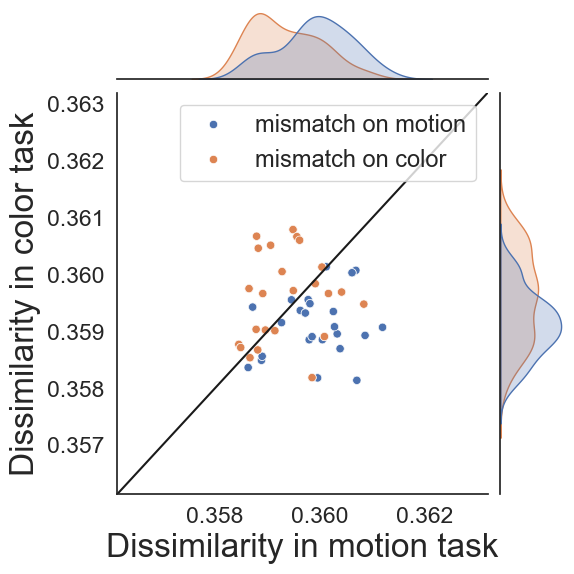

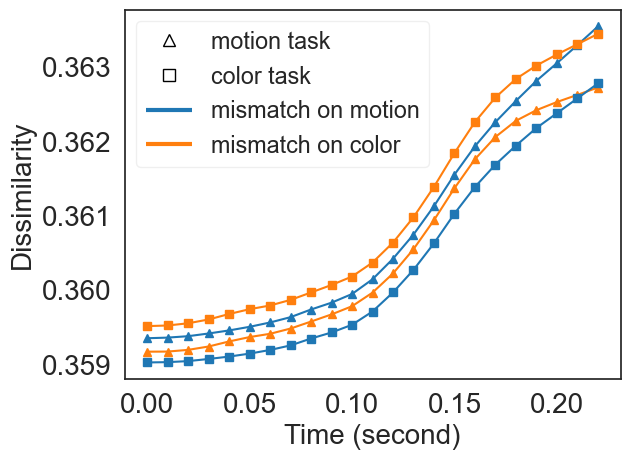

In [5]:
upper_time = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22]

np.set_printoptions(precision=2)

points={1:[90, 90],2:[90, 30],3:[90, -30],4:[90, -90],
    5:[30, 90],6:[30, 30],7:[30, -30],8:[30, -90],
    9:[-30, 90],10:[-30, 30],11:[-30, -30],12:[-30, -90],
    13:[-90, 90],14:[-90, 30],15:[-90, -30],16:[-90, -90]}

I=[11,12,15,16]
II=[9,10,13,14]
III=[1,2,5,6]
IV=[3,4,7,8]

tim = []
dis = []
q = []

# 2D plot
ISI_dhc = []
ISI_dvc = []
ISI_dhm = []
ISI_dvm = []
MotionDM = torch.load(f'../data/mini_data_stre_50ms/Motion_ISI_1000.pt') # or LSTM representations
ColourDM = torch.load(f'../data/mini_data_stre_50ms/Color_ISI_1000.pt') # or LSTM representations
dhc, dvc, dhm, dvm = ave_ratio_s(ColourDM, MotionDM, I + II + III + IV)
ISI_dhc = ISI_dhc + dhc
ISI_dhm = ISI_dhm + dhm
ISI_dvc = ISI_dvc + dvc
ISI_dvm = ISI_dvm + dvm
font_size = 1.5
y = ISI_dhc + ISI_dvc
x = ISI_dhm + ISI_dvm
plot_compare(x, y)

fig, ax = plt.subplots()
# line plot
method = 'ISI'
col=['tab:blue','tab:orange']
for task in ['color','motion']:
    tim = []
    dis_m = []
    dis_c= []
    q_m = []
    q_c=[]
    for time in upper_time:
        MotionDM = torch.load(f'../data/mini_data_stre_50ms/motion_ISI_{time}_{bin_size}ms.pt')
        ColourDM = torch.load(f'../data/mini_data_stre_50ms/color_ISI_{time}_{bin_size}ms.pt')
        dhc,dvc,dhm,dvm = ave_ratio_s(ColourDM,MotionDM,I+II+III+IV) # 3
        ISI_dhc = dhc
        ISI_dhm = dhm
        ISI_dvc = dvc
        ISI_dvm = dvm
        font_size=1.3
        y=ISI_dhc+ISI_dvc
        x=ISI_dhm+ISI_dvm
        m,c = get_distance_from(x,y,task) # a number
        dis_m.append(np.mean(m))
        dis_c.append(np.mean(c))
        tim.append(time)
    if task =='motion':
        plt.plot(tim,dis_m,'s-',color=col[0])
        plt.plot(tim,dis_c,'s-',color=col[1])
    else:
        plt.plot(tim,dis_m,'^-',color=col[0])
        plt.plot(tim,dis_c,'^-',color=col[1])
        
    if task == 'color':
        mat_color_under_m = dis_m #D_m ^ m
        mat_color_under_c = dis_c #D_m ^c
    elif task == 'motion':
        mat_motion_under_m = dis_m #D_c ^m
        mat_motion_under_c = dis_c  #D_c ^ c

marker1 = mlines.Line2D([], [], color='black', marker='s', linestyle='None', markersize=9, markerfacecolor='white', label='color task')
marker2 = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=9, markerfacecolor='white', label='motion task')
line_length=1
marker3 = mlines.Line2D([], [], color='#1f77b4',linestyle='-', linewidth=3,dashes=(line_length, 0),label='mismatch on motion')
marker4 = mlines.Line2D([], [], color='#ff7f0e',linestyle='-', linewidth=3,dashes=(line_length, 0),label='mismatch on color')

ax.legend(handles=[marker2, marker1,marker3,marker4], loc='upper left', frameon=True, shadow=False,framealpha=0.3,fontsize=16.8)

plt.xlabel("Time (second)", fontsize=20)
plt.ylabel("Dissimilarity", fontsize=20)
plt.xticks( fontsize = 20 )
plt.yticks( fontsize=20 )
plt.show() 


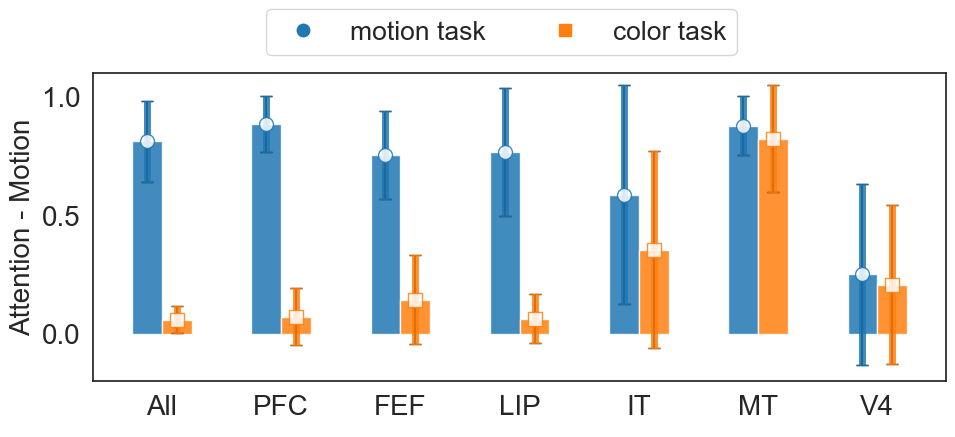

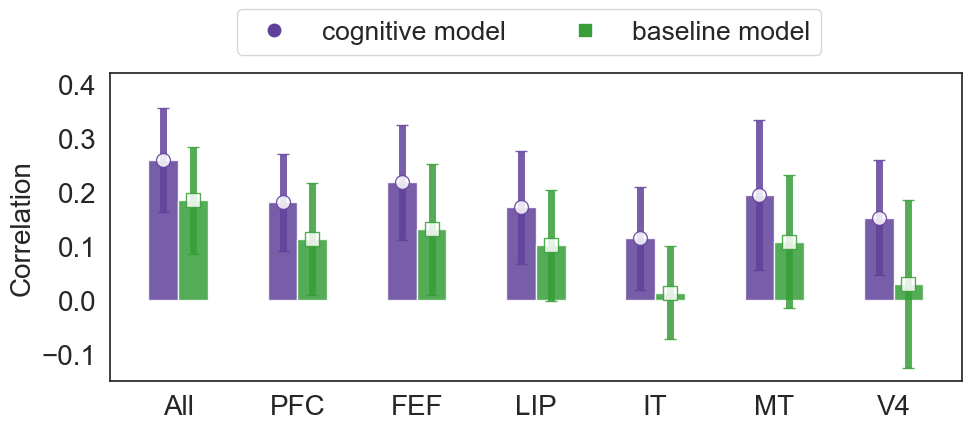

In [7]:
## attention weight with indepedent data & shifted baseline

motion_mean=[]
motion_std=[]
color_mean=[]
color_std=[]
for roi in ['all','PFC', 'FEF','LIP','IT','MT','V4']:
    data=pd.read_csv(f'../data/weight/att_{roi}_stats_weight.csv',sep=',')
    model = data[data['model']=='model']
    color = model[model['task']=='color']
    motion = model[model['task']=='motion']
    motion_mean.append(motion['weight'].mean())
    motion_std.append(motion['weight'].std())
    color_mean.append(color['weight'].mean())
    color_std.append(color['weight'].std())

col = ['#1f77b4','#ff7f0e']
group_colors = col*6

f, ax = plt.subplots(figsize=(11, 4))
combined_labels = ['All', 'PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']
x = np.array([i*2+0.5 for i in range(len(combined_labels))])
bar_width=0.5

ax.bar(x-bar_width/2, motion_mean, bar_width, color=col[0], alpha=0.85, yerr=motion_std, capsize=4)
ax.errorbar(x-bar_width/2, motion_mean, color=col[0], alpha=0.85, elinewidth=5,yerr=motion_std,fmt='o',markerfacecolor='white' ,markersize=10, capsize=4)
ax.bar(x+bar_width/2, color_mean, bar_width, color=col[1], alpha=0.85, yerr=color_std, capsize=4)
ax.errorbar(x+bar_width/2, color_mean, color=col[1], alpha=0.85, elinewidth=5, yerr=color_std,fmt='s', markerfacecolor='white' ,markersize=10, capsize=4)


combined_labels = ['All', 'PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']
ax.set_xticks([i*2 + 0.5 for i in range(len(combined_labels))])
ax.set_xticklabels(combined_labels,fontsize=20)
ax.set_yticks([0, 0.5, 1.0])
plt.ylim(-0.2,1.1)
ax.tick_params(axis='y', which='major', labelsize=20)  # Set font size for y-axis ticks

ax.set_ylabel('Attention - Motion',fontsize=20)
ax.set_xlabel(' ', fontsize=1)

import matplotlib.lines as mlines

marker1 = mlines.Line2D([], [], color=col[0], marker='o', linestyle='None', markersize=9, label='motion task')
marker2 = mlines.Line2D([], [], color=col[1], marker='s', linestyle='None', markersize=9, label='color task')

ax.legend(handles=[marker1, marker2],bbox_to_anchor=(0.77, 1.25), ncol=3, frameon=True, shadow=False, fontsize=19)
plt.show()




model_mean=[]
model_std=[]
non_mean=[]
non_std=[]

for roi in ['all','PFC', 'FEF','LIP','IT','MT','V4']:
    data=pd.read_csv(f'../data/weight/att_{roi}_stats.csv',sep=',')
    model = data[data['model']=='cogmodel']
    nonmodel = data[data['model']=='nonmodel']

    model_mean.append(model['score'].mean())
    model_std.append(model['score'].std())
    non_mean.append(nonmodel['score'].mean())
    non_std.append(nonmodel['score'].std())
    

col = ['#60419A','#379E38']
f, ax = plt.subplots(figsize=(11, 4))
combined_labels = ['All', 'PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']
x = np.array([i*2+0.5 for i in range(len(combined_labels))])
bar_width=0.5

ax.bar(x-bar_width/2, model_mean, bar_width, color=col[0], label='cognitive model', alpha=0.85)
ax.errorbar(x-bar_width/2, model_mean, color=col[0], alpha=0.85, elinewidth=5,yerr=model_std,fmt='o',markerfacecolor='white' ,markersize=10, capsize=4)
ax.bar(x+bar_width/2, non_mean, bar_width, color=col[1], label='baseline model', alpha=0.85)
ax.errorbar(x+bar_width/2, non_mean, color=col[1], alpha=0.85, elinewidth=5, yerr=non_std,fmt='s', markerfacecolor='white' ,markersize=10, capsize=4)


ax.set_xticks([i*2 + 0.5 for i in range(len(combined_labels))])
ax.set_xticklabels(combined_labels,fontsize=20)
ax.set_yticks([-0.1,0,0.1, 0.2,0.3,0.4])
plt.ylim(-0.15,0.42)
ax.tick_params(axis='y', which='major', labelsize=20)  # Set font size for y-axis ticks

ax.set_ylabel('Correlation',fontsize=20)
ax.set_xlabel(' ', fontsize=1)

import matplotlib.lines as mlines

marker1 = mlines.Line2D([], [], color=col[0], marker='o', linestyle='None', markersize=9, label='cognitive model')
marker2 = mlines.Line2D([], [], color=col[1], marker='s', linestyle='None', markersize=9, label='baseline model')

ax.legend(handles=[marker1, marker2],bbox_to_anchor=(0.85, 1.25), ncol=3, frameon=True, shadow=False, fontsize=19)
plt.show()

In [8]:
import itertools
import matplotlib

def compare(Mtr, Mat):
    Mcolour_vec = torch.zeros(120)
    Base_vec = np.zeros(120)
    cc = 0
    for row in range(16):
        for col in range(row + 1, 16):
            Mcolour_vec[cc] = Mat[row, col]
            Base_vec[cc] = Mtr[row, col]
            cc += 1

    [corr, pvalue] = stats.spearmanr(Base_vec, Mcolour_vec)
    return corr 

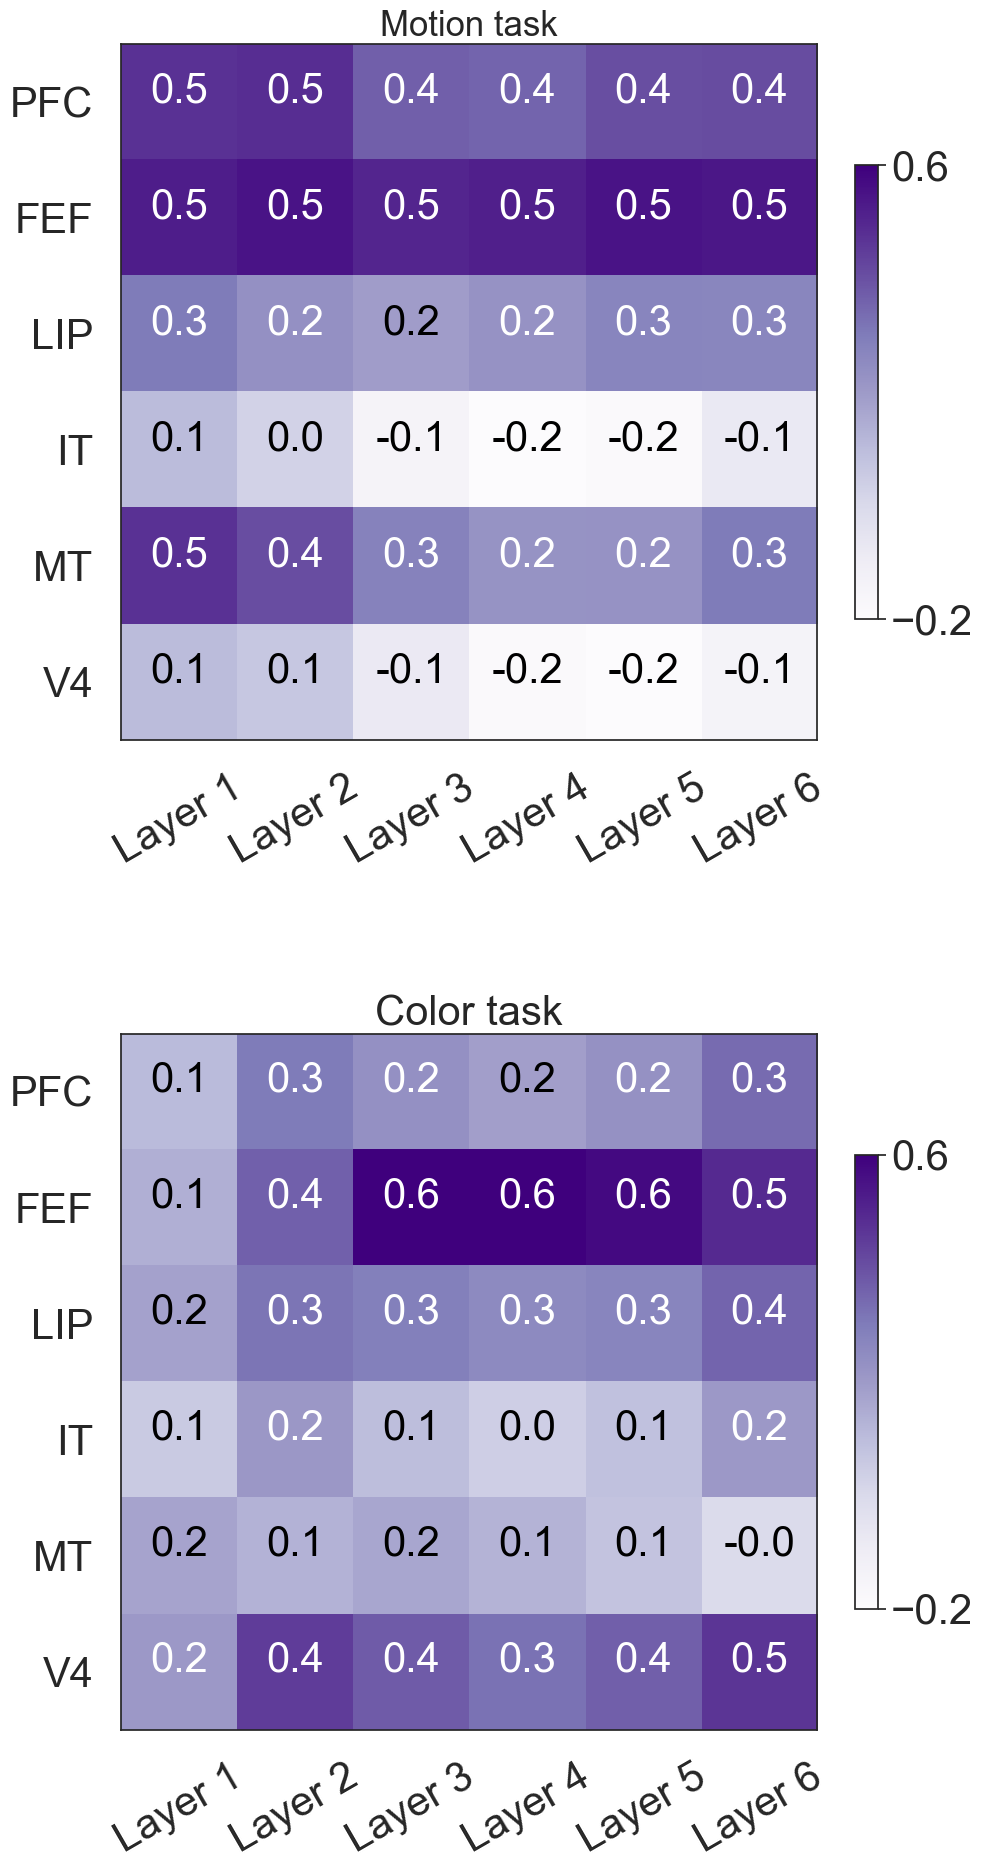

In [9]:
## ****** Demo for Figure 5 ****** ##
# here we take 150th image (a random chosen number) for an example

for time in [150]: 
    time_c = time / 60 - 1.5
    k = 0
    plt.figure(figsize=(10, 20))
    for task in ['motion', 'color']:
        H= torch.zeros(6,6) # row is region, column is layer
        for roi in ['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']:
            if task == 'motion':
                baseline_matrix = torch.load(f'../data/mini_data_50ms/bs1_{roi}_Motion_ISI.pt')
            elif task == 'color':
                baseline_matrix = torch.load(f'../data/mini_data_50ms/bs1_{roi}_Color_ISI.pt') 
            for layer in [1,2,3,4,5,6]:
                correlation = []
                test_matrix = torch.load(f'../data/mini_data_50ms/bs1_{layer}layer_task_{task}_{time}.pt')

                H[['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4'].index(roi), layer - 1] = compare(test_matrix,
                                                                                            baseline_matrix)
        CM = H.numpy()
        cmap = plt.get_cmap('Purples')
        norm = matplotlib.colors.Normalize(vmin=-0.2,vmax=0.6)
        if task=='motion':
            plt.subplot(211)
            plt.imshow(CM, interpolation='nearest', cmap=cmap,norm=norm)
            plt.title('Motion task',fontsize=25)
        elif task=='color':
            plt.subplot(212)
            plt.imshow(CM, interpolation='nearest', cmap=cmap,norm=norm)
            plt.title('Color task',fontsize=30)

        roi_names = ['PFC', 'FEF', 'LIP', 'IT', 'MT', 'V4']
        layer_names = ['Layer 1','Layer 2','Layer 3','Layer 4','Layer 5','Layer 6']
        tick_marks = np.arange(len(roi_names))
        plt.xticks(tick_marks, layer_names, rotation=30,fontsize=30)
        plt.yticks(tick_marks, roi_names,fontsize=30)
        plt.tick_params(axis='both', 
                        direction='out', 
                        length=10, 
                        width=2, 
                        pad=10)
        cbar = plt.colorbar(ticks=([-0.2, 0.6]),fraction=0.03)
        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(30)
        thresh = CM.mean()
        for i, j in itertools.product(range(CM.shape[0]), range(CM.shape[1])):
            plt.text(j, i, "{:.1f}".format(CM[i, j]),fontsize=30,
                        horizontalalignment="center",
                        color="white" if CM[i,j]>=0.2 else "black")
    plt.tight_layout(pad=1)
    plt.show()
